# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [15]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [16]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [17]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [18]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [19]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-01T13:01:29+0300',
 'created_at': '2023-03-01T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [20]:
data['found']

256

Количество страниц в результатах поиска

In [21]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [22]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-01T13:01:29+0300,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,None,None,2023-03-03T16:06:49+0300,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [23]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [24]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [25]:
def get_params(i):
    return {
        'text': ' OR '.join(['Data Scientist', 'Data Engineer', 
                            'Machine Learning', 'аналитик данных', 
                            'дата аналитик', 'ML', 'ML-инженер', 'data engineer']),
        'area': 1,
        'page': i,
        'per_page': 100
    }


URL = 'https://api.hh.ru/vacancies'

req = requests.get(URL, get_params(0))
data = json.loads(req.content.decode())

num_of_pages = data['pages']
df = pd.json_normalize(data['items'])

for i in range(1, num_of_pages):
    sleep(0.1)
    req = requests.get(URL, get_params(i))
    data = json.loads(req.content.decode())
    page_df = pd.json_normalize(data['items'])
    df = df.append(page_df, ignore_index=True)
df

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.id,employer.logo_urls,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,insider_interview.id,insider_interview.url
0,77113559,False,Data Engineer,NaN,False,False,NaN,None,None,2023-03-04T09:22:31+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76542547,False,Senior Data engineer,NaN,False,False,NaN,None,None,2023-03-04T12:41:46+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76945904,False,Data Engineer,NaN,True,False,NaN,None,None,2023-03-04T06:36:13+0300,...,55799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77208642,False,Data Scientist middle+/Senior,NaN,False,False,NaN,None,None,2023-03-04T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77120466,False,Data Engineer (Backend),NaN,False,False,NaN,None,None,2023-03-04T10:56:44+0300,...,6867540,NaN,Деловой центр,МЦК,95.537,95,55.747222,37.532222,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,77467507,False,Бизнес аналитик проекта Лояльность,NaN,False,False,NaN,None,None,2023-02-28T10:00:47+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,77214096,False,Аналитик продаж на маркетплейсаж,NaN,False,False,NaN,None,None,2023-02-28T09:37:59+0300,...,5941877,NaN,Авиамоторная,Калининская,8.1,8,55.751933,37.717444,NaN,NaN
1997,77440141,False,Системный аналитик (F.Doc),NaN,False,False,NaN,None,None,2023-02-27T15:55:40+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,76345056,False,Главный специалист / Аналитик антифрода,NaN,False,False,NaN,None,None,2023-02-28T10:04:25+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [26]:
def decode_info(i):
    sleep(0.1)
    vacancy = df['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())

    return vacancy_info

In [27]:
# сбор подробных данных, работает долго
vacancy_infos = [decode_info(i) for i in range(0, len(df))]
df_info = pd.DataFrame(vacancy_infos)

Теперь избавимся от дубликатов и уберём колонки со всеми значениями None:

In [166]:
dfc = df_info.copy()
nan_columns = [column_name for column_name in dfc.columns if dfc[column_name].count() == 0]
dfc.drop(columns=nan_columns, inplace=True)
dfc = dfc.loc[dfc.astype(str).drop_duplicates().index]
None

In [83]:
dfc.to_excel('da_vacancies.xlsx')

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [84]:
data['found']

7680

Как минимум на hh.ru доступно 7730 уникальных вакансий, связанных с анализом данных, мы же смогли загрузить только 20 страниц по 100 вакансий на каждой из-за ограничения самого hh.ru.

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [85]:
skills = []
for index, skills_dict in pd.DataFrame(dfc['key_skills']).iterrows():
  help = pd.json_normalize(pd.DataFrame(dfc['key_skills']).loc[index]).loc[0].to_list()
  skills += [list(d.values())[0] for d in help]
skill_set = set(skills)

In [86]:
skill_counts = {}
for skill in skill_set:
  skill_counts[skill] = skills.count(skill)
sorted_skill_counts = dict(sorted(skill_counts.items(), key = lambda x: x[1], reverse = True)[:15])

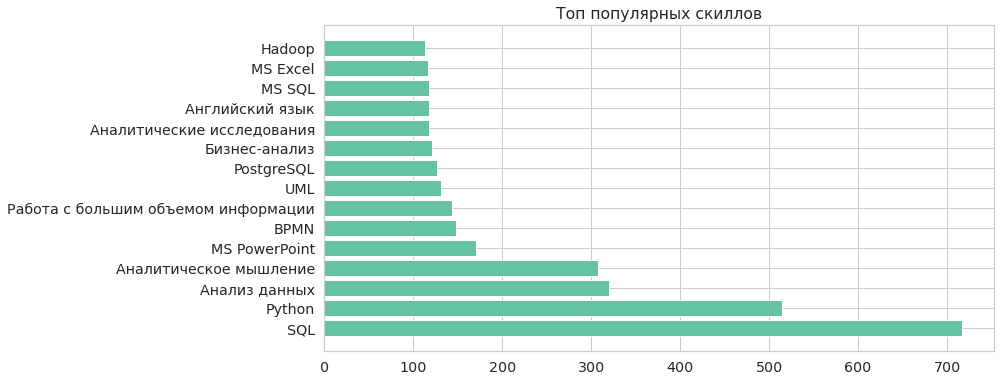

In [87]:
f, ax = plt.subplots(figsize=(12,6))
plt.barh(range(len(sorted_skill_counts)), list(sorted_skill_counts.values()))
plt.yticks(range(len(sorted_skill_counts)), list(sorted_skill_counts.keys()))
ax.set_title('Топ популярных скиллов')
None

Мы получили, что самым востребованным навыком является владение SQL, далее идут Python, анализ данных и аналитическое мышление.

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [88]:
gross_coeff = 0.87
usd_to_rur = 75.40
eur_to_rur = 80.30

In [89]:
salary_lows = []
salary_highs = []


def convert_to_rub(salary, currency, gross_flag):
  if salary == None:
    return None
  cur_gross_coeff = 1
  if gross_flag: 
    cur_gross_coeff *= gross_coeff
  if currency == 'USD':
    return salary * usd_to_rur * cur_gross_coeff
  elif currency == 'EUR':
    return salary * eur_to_rur * cur_gross_coeff
  else:
    return salary * cur_gross_coeff

def process_salaries(index):
  if dfc['salary'][index] == None:
    return
  row_gross = dfc['salary'][index]['gross']
  row_currency = dfc['salary'][index]['currency']
  row_low = convert_to_rub(dfc['salary'][index]['from'], row_currency, row_gross)
  row_high = convert_to_rub(dfc['salary'][index]['to'], row_currency, row_gross)
  if row_low == None:
    row_low = row_high
  if row_high == None:
    row_high = row_low
  if row_low != None:    
    salary_lows.append(row_low)
  if row_high != None:
    salary_highs.append(row_high)


for i in dfc.index:
  process_salaries(i)


salary_lows = [int(i/1000) for i in salary_lows]
salary_highs = [int(i/1000) for i in salary_highs]

In [90]:
low_salaries_dict = {'salary': salary_lows, 'bound': len(salary_lows) * ['low']}
high_salaries_dict = {'salary': salary_highs, 'bound': len(salary_highs) * ['high']} 
low_salaries_df = pd.DataFrame(low_salaries_dict)
high_salaries_df = pd.DataFrame(high_salaries_dict)
salaries_df = df = low_salaries_df.append(high_salaries_df, ignore_index=True)

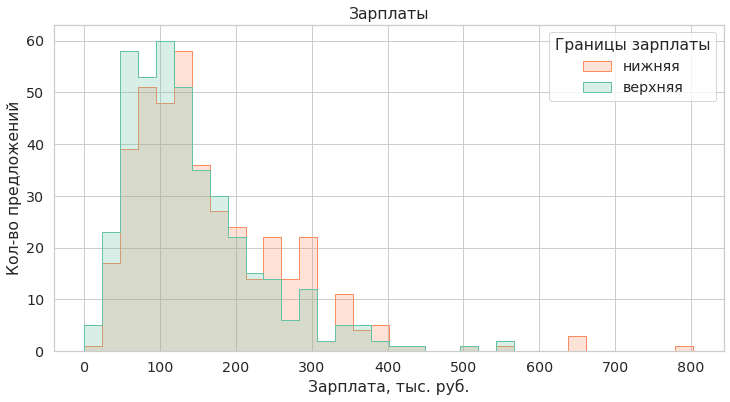

In [91]:
fig, axes = plt.subplots(figsize=(12,6))
sns.histplot(salaries_df, x="salary", hue="bound", element="step")
axes.set(xlabel='Зарплата, тыс. руб.', ylabel='Кол-во предложений')
plt.title('Зарплаты')
plt.legend(title='Границы зарплаты', labels=['нижняя', 'верхняя'])
None

На этом графике видно, что больше всего предложений поступает от 50.000 до 200.000 рублей.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

# Битмейкеры

In [39]:
def get_params(i):
    return {
        'text': ' OR '.join(['музыкант', 'битмейкер', 'бит мейкер', 'рэпер', 
                            'музыкальный продюссер', 'репер', 'композитор', 
                            'музыкальный исполнитель', 'певец',
                            'саундпродюссер', 'аудио', 'видео', 'блоггинг',
                            'клип']),
        'area': 1,
        'page': i,
        'per_page': 100
    }


URL = 'https://api.hh.ru/vacancies'

req = requests.get(URL, get_params(0))
data_rap = json.loads(req.content.decode())

num_of_pages = data_rap['pages']
df_rap = pd.json_normalize(data_rap['items'])

for i in range(1, num_of_pages):
    sleep(0.1)
    req = requests.get(URL, get_params(i))
    data_rap = json.loads(req.content.decode())
    page_df = pd.json_normalize(data_rap['items'])
    df_rap = df_rap.append(page_df, ignore_index=True)
df_rap

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,schedule.name,address.metro,address,department.id,department.name,employer.logo_urls,salary,insider_interview.id,insider_interview.url,immediate_redirect_url
0,77208624,False,Менеджер отдела продаж - Персональное аудио (P...,NaN,False,True,None,None,2023-03-04T12:06:29+0300,2023-03-04T12:06:29+0300,...,Сменный график,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72341559,False,"Директор магазина, управляющий (аудио- и видео...",NaN,False,False,None,None,2023-03-03T12:14:35+0300,2023-03-03T12:14:35+0300,...,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73544901,False,Продавец-консультант на бренд Samsung (аудио-в...,NaN,False,False,None,None,2023-03-03T16:45:38+0300,2023-03-03T16:45:38+0300,...,Полный день,NaN,NaN,1947314-1947314-ancor,ANCOR,NaN,NaN,NaN,NaN,NaN
3,76890764,False,Певец/исполнитель,NaN,False,False,None,None,2023-03-03T01:28:15+0300,2023-03-03T01:28:15+0300,...,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77007182,False,Руководитель отдела контента (интернет-магазин...,NaN,False,False,None,None,2023-03-02T15:42:00+0300,2023-03-02T15:42:00+0300,...,Удаленная работа,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,76645944,False,Байер / Менеджер по закупкам (Китай одежда),NaN,False,False,None,None,2023-03-02T10:15:01+0300,2023-03-02T10:15:01+0300,...,Удаленная работа,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,76813885,False,Аналитик IT проекта,NaN,False,False,None,None,2023-03-02T13:35:56+0300,2023-03-02T13:35:56+0300,...,Удаленная работа,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,77319073,False,"Программист микроконтроллеров, Embedded softwa...",NaN,True,False,None,None,2023-03-03T11:13:51+0300,2023-03-03T11:13:51+0300,...,Гибкий график,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,77411853,False,Администратор сайта на Bitrix,NaN,False,False,None,None,2023-03-02T10:12:32+0300,2023-03-02T10:12:32+0300,...,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
def decode_info_rap(i):
    sleep(0.1)
    vacancy = df_rap['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())

    return vacancy_info

In [41]:
# сбор подробных данных, работает долго
vacancy_infos = [decode_info_rap(i) for i in range(0, len(df_rap))]
df_info_rap = pd.DataFrame(vacancy_infos)

In [167]:
dfcr = df_info_rap.copy()
nan_columns = [column_name for column_name in dfcr.columns if dfcr[column_name].count() == 0]
dfcr.drop(columns=nan_columns, inplace=True)
dfcr = dfcr.loc[dfcr.astype(str).drop_duplicates().index]
None

In [43]:
dfc.to_excel('rap_vacancies.xlsx')

In [44]:
data_rap['found']

7050

Итого имеем 7050 доступных вакансий на место музыкального исполнителя или клип-режиссёра. 

In [45]:
skills = []
for index, skills_dict in pd.DataFrame(dfcr['key_skills']).iterrows():
  help = pd.json_normalize(pd.DataFrame(dfcr['key_skills']).loc[index]).loc[0].to_list()
  skills += [list(d.values())[0] for d in help]
skill_set = set(skills)

In [46]:
skill_counts = {}
for skill in skill_set:
  skill_counts[skill] = skills.count(skill)
sorted_skill_counts = dict(sorted(skill_counts.items(), key = lambda x: x[1], reverse = True)[:15])

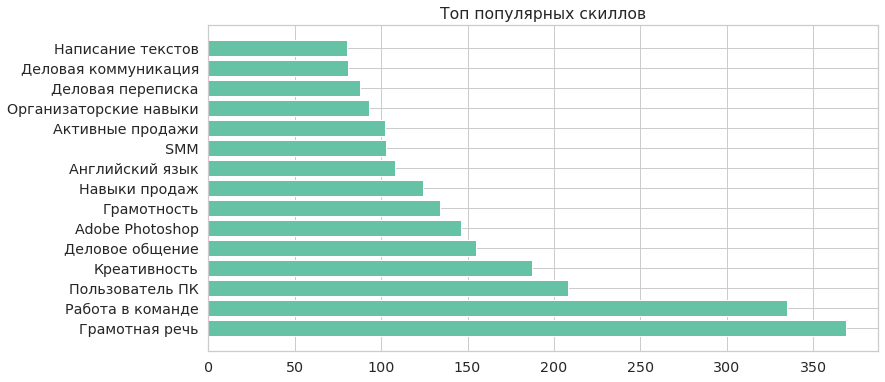

In [47]:
f, ax = plt.subplots(figsize=(12,6))
plt.barh(range(len(sorted_skill_counts)), list(sorted_skill_counts.values()))
plt.yticks(range(len(sorted_skill_counts)), list(sorted_skill_counts.keys()))
ax.set_title('Топ популярных скиллов')
None

Среди музыкантов и монтажеров видео самыми популярными навыками оказались: грамотная речь, работа в команде и пользование ПК.

In [48]:
gross_coeff = 0.87
usd_to_rur = 75.40
eur_to_rur = 80.30

In [49]:
salary_lows = []
salary_highs = []


def convert_to_rub(salary, currency, gross_flag):
  if salary == None:
    return None
  cur_gross_coeff = 1
  if gross_flag: 
    cur_gross_coeff *= gross_coeff
  if currency == 'USD':
    return salary * usd_to_rur * cur_gross_coeff
  elif currency == 'EUR':
    return salary * eur_to_rur * cur_gross_coeff
  else:
    return salary * cur_gross_coeff

def process_salaries(index):
  if dfcr['salary'][index] == None:
    return
  row_gross = dfcr['salary'][index]['gross']
  row_currency = dfcr['salary'][index]['currency']
  row_low = convert_to_rub(dfcr['salary'][index]['from'], row_currency, row_gross)
  row_high = convert_to_rub(dfcr['salary'][index]['to'], row_currency, row_gross)
  if row_low == None:
    row_low = row_high
  if row_high == None:
    row_high = row_low
  if row_low != None:    
    salary_lows.append(row_low)
  if row_high != None:
    salary_highs.append(row_high)


for i in dfcr.index:
  process_salaries(i)


salary_lows = [int(i/1000) for i in salary_lows]
salary_highs = [int(i/1000) for i in salary_highs]

In [50]:
low_salaries_dict = {'salary': salary_lows, 'bound': len(salary_lows) * ['low']}
high_salaries_dict = {'salary': salary_highs, 'bound': len(salary_highs) * ['high']} 
low_salaries_df = pd.DataFrame(low_salaries_dict)
high_salaries_df = pd.DataFrame(high_salaries_dict)
salaries_df = df = low_salaries_df.append(high_salaries_df, ignore_index=True)

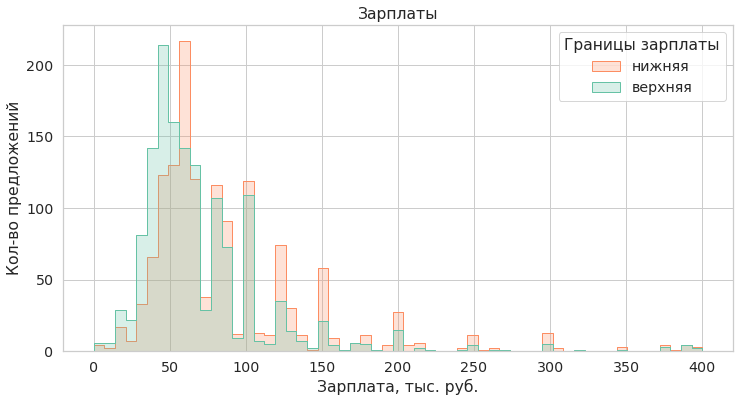

In [51]:
fig, axes = plt.subplots(figsize=(12,6))
sns.histplot(salaries_df.query('salary <= 400'), x="salary", hue="bound", element="step")
axes.set(xlabel='Зарплата, тыс. руб.', ylabel='Кол-во предложений')
plt.title('Зарплаты')
plt.legend(title='Границы зарплаты', labels=['нижняя', 'верхняя'])
None

В музыкальной нише зарплаты в основном варьюруются от 25.000 до 100.000 рублей.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


# Data scientists
Исследуем более детально профессии, связанные с анализом данных

### Требуемый опыт работы

In [137]:
experiences = []
dfc['experience']
for index in dfc.index:
  experiences += [dfc['experience'][index]['name']]
experiences_intervals = set(experiences)
exp_ratios = [experiences.count(exp)/len(experiences) for exp in experiences_intervals]

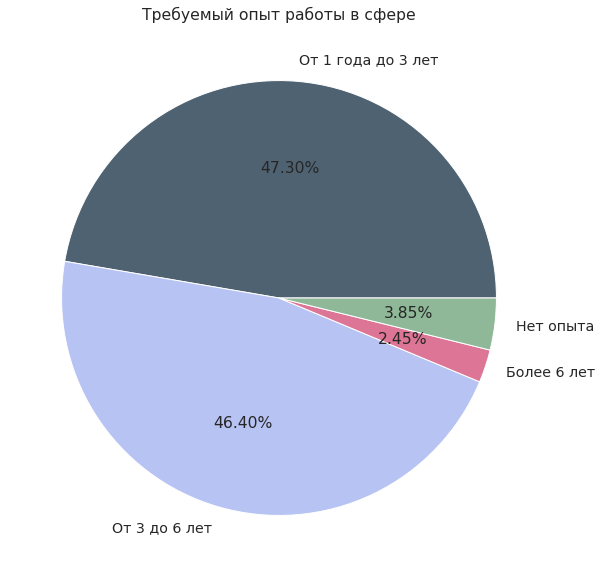

In [138]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
fig = plt.figure(figsize=(10, 10))

plt.title('Требуемый опыт работы в сфере')
plt.pie(exp_ratios, labels=experiences_intervals, autopct='%.2f%%', colors=colors)
None

В сфере анализа данных почти половину нишы покрывают вакансии с требуемым опытом работы от 1 до 3 лет и от 3 до 6 лет. Самым опытным специалистам и только начинающим программистам выпадает самая мелкая часть рынка: 3.7% и 2.3% вакансий.

### Топ работадателей

In [139]:
employers = []
for index in dfc['employer'].index:
  employers += [dfc['employer'][index]['name']]
employers_set = set(employers)

In [140]:
employers_counts = {}
for employer in employers_set:
  employers_counts[employer] = employers.count(employer)
sorted_employers_counts = dict(sorted(employers_counts.items(), key = lambda x: x[1], reverse = True)[:15])

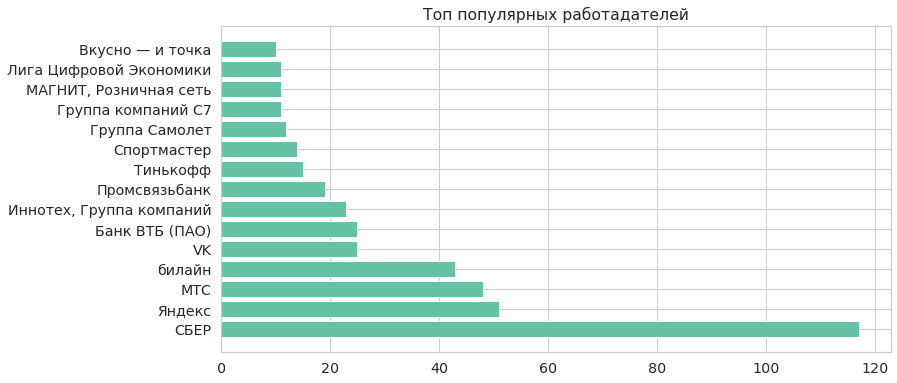

In [141]:
f, ax = plt.subplots(figsize=(12,6))
plt.barh(range(len(sorted_employers_counts)), list(sorted_employers_counts.values()))
plt.yticks(range(len(sorted_employers_counts)), list(sorted_employers_counts.keys()))
ax.set_title('Топ популярных работадателей')
None

В топе работадателей расположились крупные компании как Сбер, Яндекс, МТС и билайн. Также можно заметить в топе большую часть банков как ВТБ, РОСБАНК и Тинькофф.

### Геолокация

In [142]:
import plotly.express as px
import plotly.offline as po

In [168]:
lats = []
lngs = []
for index in dfc['address'].index:
  if dfc['address'][index] == None or dfc['address'][index]['city'] != 'Москва':
    continue
  lats += [dfc['address'][index]['lat']]
  lngs += [dfc['address'][index]['lng']]
address_df = pd.DataFrame({'lat': lats, 'lng': lngs})

Text(0.5, 1.0, 'Адреса компаний в Москве')

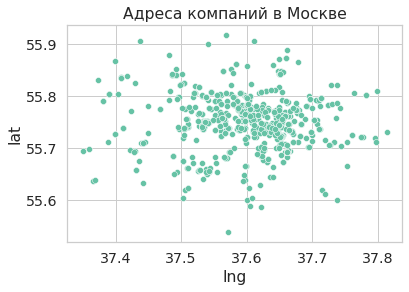

In [144]:
sns.scatterplot(data=address_df, x='lng', y='lat')
plt.title('Адреса компаний в Москве')

Text(0.5, 1.0, 'Адреса компаний в Москве')

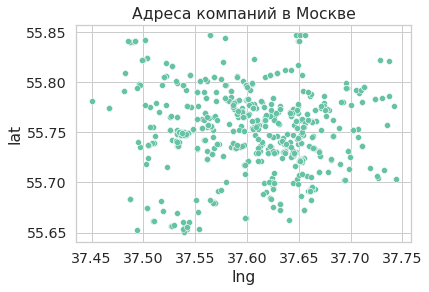

In [145]:
zoomed_df = address_df.query('37.45 < lng < 37.75 and 55.65 < lat < 55.85')
sns.scatterplot(data=zoomed_df, x='lng', y='lat')
plt.title('Адреса компаний в Москве')

In [159]:
fig = px.scatter_mapbox(zoomed_df, lat='lat', lon='lng', 
                        color_discrete_sequence=['dark blue'], 
                        zoom=10, height=500, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [163]:
addr_rounded = zoomed_df.copy()
addr_rounded['lng'] = np.round(addr_rounded['lng'] * 4, decimals = 1) * 0.25
addr_rounded['lat'] = np.round(addr_rounded['lat'] * 4, decimals = 1) * 0.25

In [164]:
addr_rounded_big = addr_rounded.copy()
addr_rounded_big['num_companies'] = 1
tmp_data = pd.pivot_table(addr_rounded_big, values = 'num_companies', index = 'lat', 
                                columns = 'lng', aggfunc = np.sum)
None

Text(0.5, 1.0, 'Рсапределение офисов по городу')

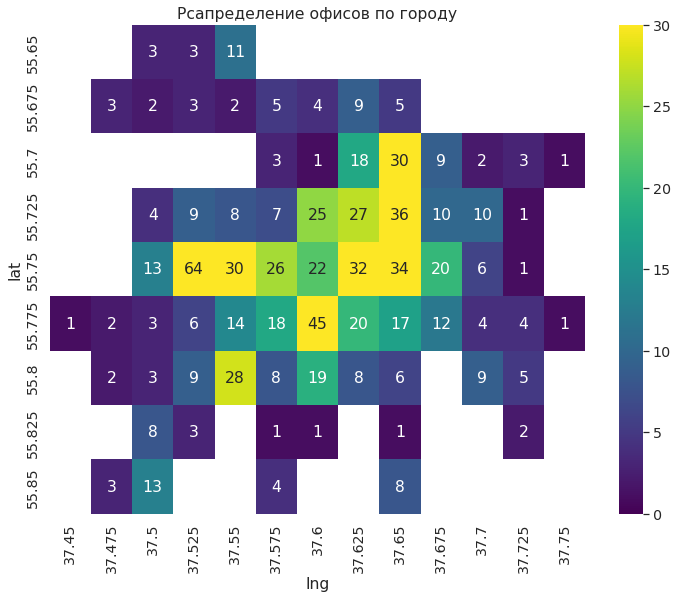

In [165]:
addr_rounded_big = pd.pivot_table(addr_rounded_big, values = 'num_companies', index = 'lat', 
                                columns = 'lng', aggfunc = np.sum)
plt.figure(figsize=(12, 9))
sns.heatmap(addr_rounded_big, annot = True, vmin=0, vmax=30, cmap = 'viridis')
plt.title('Рсапределение офисов по городу')

Как и ожидалось, больше всего вакансий с офисом в центре Москвы, есть небольшое смещение влево в районе (37.5, 55.75).

# Вывод


Работадатели, нанимающие аналитиков данных, хотят видеть работников с опытом от 1 до 6 лет, умеющих обращаться с SQL и Python и имеющих аналитическое мышление. Нанимать аналитиков любят банки, Яндекс и операторы мобильной связи. Офисы чаще всего расположены в центре, возможно, с небольшим смещением.
